# 1.1.1

In [1]:
def qZ(x,y):
    return (x-3 * y+1) / (3*x**2 + 3*y**2 + 1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

def evoStep(X,Y,Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

def evoSteps(X, Y, stepsNum=4):
    results=[]
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results

X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:    {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:    1.0


# Задание

In [18]:
def qZ(x,y):
    return (x - 3*y + 1) / (3*x**2 + y**2 + 1)

X = [-2, -1, 0, 2]
Y = [-2, 0, -1, 1]

# реализация алгоритма
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:    {max(qualityArrZ)}')

max_1_step: 2.2941176470588234
max_2_step: 0.9714285714285713
max_3_step: 4.823529411764706
max_4_step: 5.828571428571428
max Z:    2.0


# 1.2.1

In [4]:
import networkx as nx
from math import e

In [5]:
distances =[(1, 2, 20),
            (1, 3, 48),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины ребер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # nocnedo6amensnocms sanen Gepuun

P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

In [6]:
def probability(delta, T):
    return 100 * e ** (-delta/T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

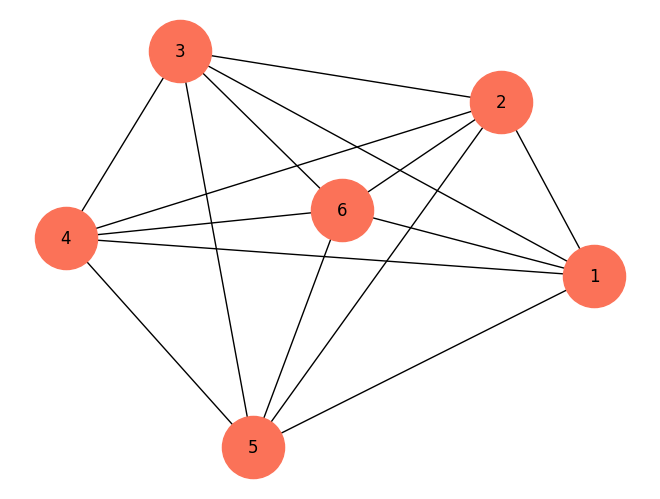

In [7]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # Добавление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [8]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1)
                    for item in distances])

In [9]:
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)

In [10]:
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [11]:
def routeReplacement(V,Z):
    for z in Z:
        V = routeReplacement(V,z)
    return V

In [12]:
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длин пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # Длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница длин старого и нового маршрута 

        # в случае если разница между длинами больше нуля, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности

            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) # вычисление температуры
    return V, arrSum

In [13]:
from xml.dom import NOT_FOUND_ERR


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
длина лучшего выбранного маршрута: 146
длины всех рассмотренных маршрутов: [197, 217, 186, 146, 166]


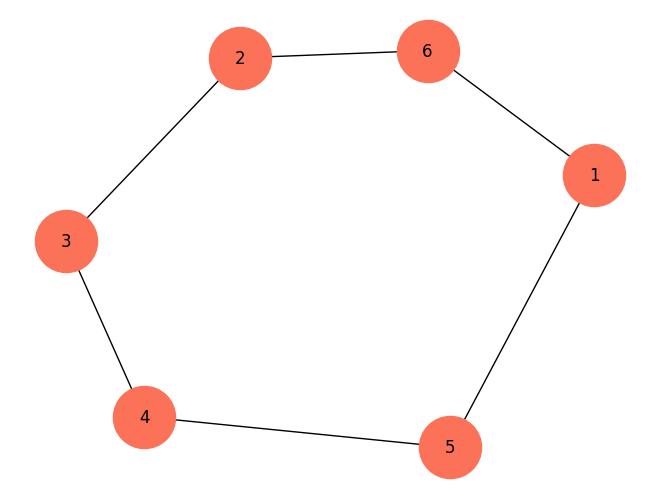

In [14]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'лучший выбранный маршрут: {bestRoute}')
print(f'длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

# Задание

In [19]:
distances =[(1, 2, 18),
            (1, 3, 41),
            (1, 4, 36),
            (1, 5, 29),
            (1, 6, 19),
            (2, 3, 27),
            (2, 4, 31),
            (2, 5, 37),
            (2, 6, 15),
            (3, 4, 19),
            (3, 5, 42),
            (3, 6, 23),
            (4, 5, 24),
            (4, 6, 17),
            (5, 6, 24)] # длины ребер

V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(2, 4),
     (3, 4),
     (4, 6),
     (5, 6)] 

P = [63, 49, 45, 53] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

лучший выбранный маршрут: [1, 5, 3, 4, 6, 2, 1]
длина лучшего выбранного маршрута: 140
длины всех рассмотренных маршрутов: [141, 128, 140, 166, 155]


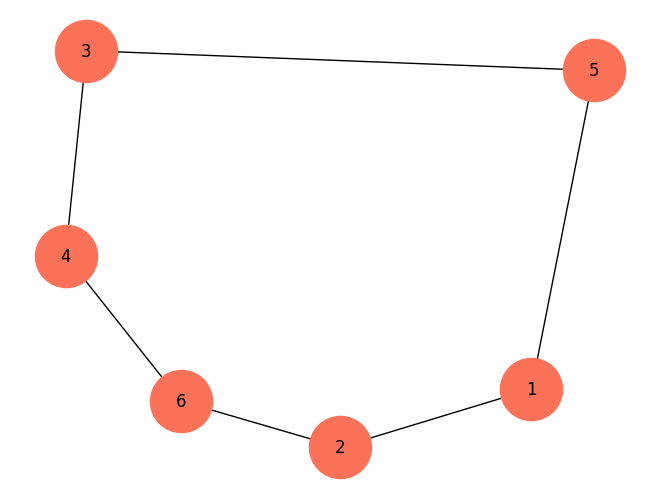

In [20]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'лучший выбранный маршрут: {bestRoute}')
print(f'длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута